In [2]:
from fbprophet import Prophet
import numpy as np, pandas as pd

In [4]:
df = pd.read_csv('nifty_main.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,22-Jul-10,5441.95,5399.15,5447.15,5372.20,156.00M,0.79%
1,23-Jul-10,5449.10,5441.90,5477.50,5435.15,165.93M,0.13%
2,26-Jul-10,5418.60,5446.55,5466.25,5409.20,147.33M,-0.56%
3,27-Jul-10,5430.60,5420.20,5450.95,5407.20,155.31M,0.22%
4,28-Jul-10,5397.55,5436.10,5447.85,5386.25,146.94M,-0.61%


In [5]:
ts = df[['Date', 'Open']]
ts.head()

,Date,Open
0,22-Jul-10,5399.15
1,23-Jul-10,5441.90
2,26-Jul-10,5446.55
3,27-Jul-10,5420.20
4,28-Jul-10,5436.10


In [6]:
ts.columns = ['ds', 'y']
ts.head()

,ds,y
0,22-Jul-10,5399.15
1,23-Jul-10,5441.90
2,26-Jul-10,5446.55
3,27-Jul-10,5420.20
4,28-Jul-10,5436.10


In [7]:
# COnvert y in to log transformation and keep original 
ts['y_orgin']=ts['y']
ts['y']=np.log(ts['y'])

ts.head()

/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,y,y_orgin
0,22-Jul-10,8.593997,5399.15
1,23-Jul-10,8.601884,5441.90
2,26-Jul-10,8.602738,5446.55
3,27-Jul-10,8.597888,5420.20
4,28-Jul-10,8.600817,5436.10


In [8]:
model = Prophet()
model.fit(ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_data = model.make_future_dataframe(periods=6)
forecast_data = model.predict(future_data)

In [15]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2004,2018-08-16,9.346193,9.312012,9.382955
2005,2018-08-17,9.345198,9.310278,9.381251
2006,2018-08-20,9.341146,9.307348,9.377541
2007,2018-08-21,9.340899,9.305020,9.378748
2008,2018-08-22,9.340898,9.306465,9.377632
2009,2018-08-23,9.340245,9.304612,9.374375
2010,2018-08-24,9.339709,9.303987,9.374793
2011,2018-08-25,9.345427,9.310791,9.382107
2012,2018-08-26,9.343185,9.305442,9.380109
2013,2018-08-27,9.337743,9.300930,9.371948


In [13]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2003,14-Aug-18,11435.10,11381.70,11452.45,11370.80,239.84M,0.70%
2004,16-Aug-18,11385.05,11397.15,11449.85,11366.25,299.61M,-0.44%
2005,17-Aug-18,11470.75,11437.15,11486.45,11431.80,241.99M,0.75%
2006,20-Aug-18,11551.75,11502.10,11565.30,11499.65,239.84M,0.71%
2007,21-Aug-18,11570.90,11581.40,11581.40,11539.85,230.95K,0.17%


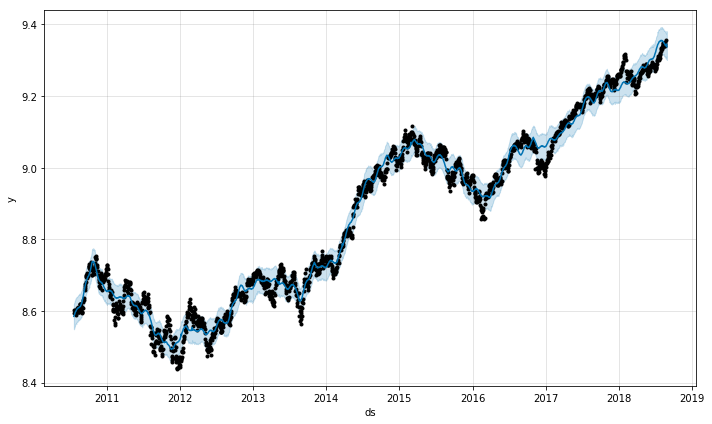

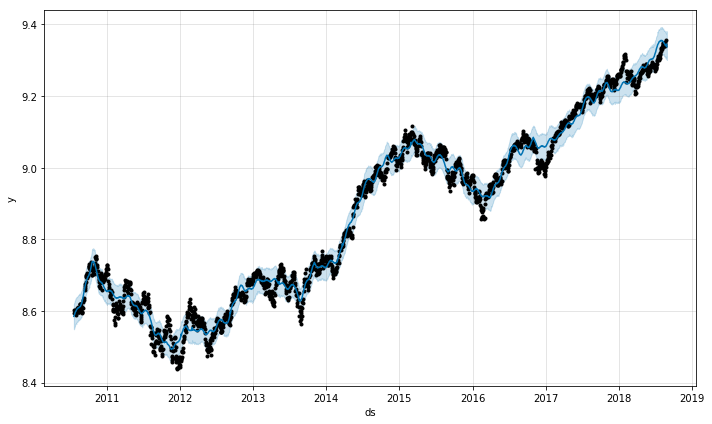

In [14]:
model.plot(forecast_data)

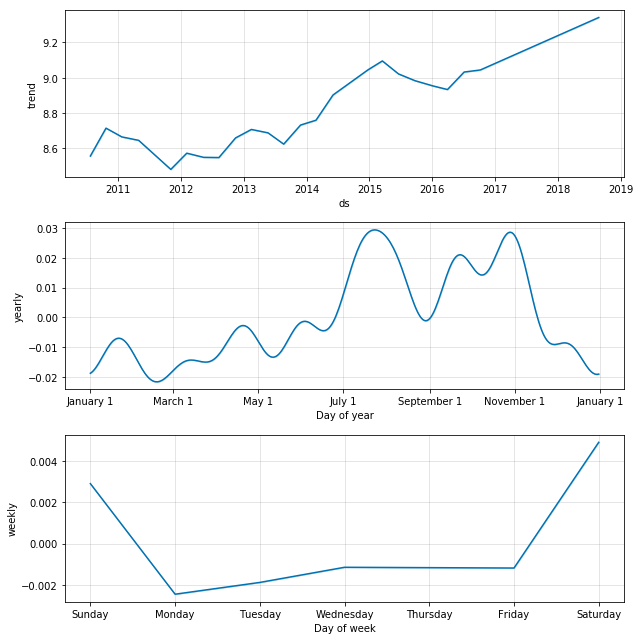

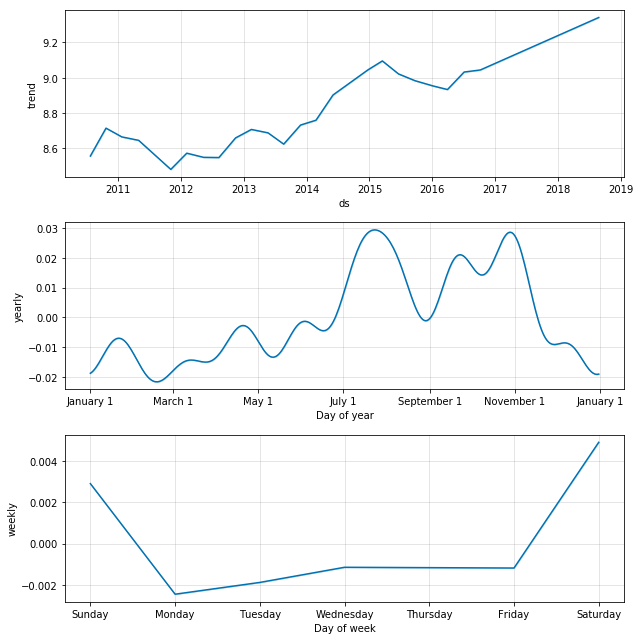

In [16]:
model.plot_components(forecast_data)

In [17]:
forecast_data_origin = forecast_data
forecast_data_origin['yhat']=np.exp(forecast_data_origin['yhat'])
forecast_data_origin['yhat_lower']=np.exp(forecast_data_origin['yhat_lower'])
forecast_data_origin['yhat_upper']=np.exp(forecast_data_origin['yhat_upper'])

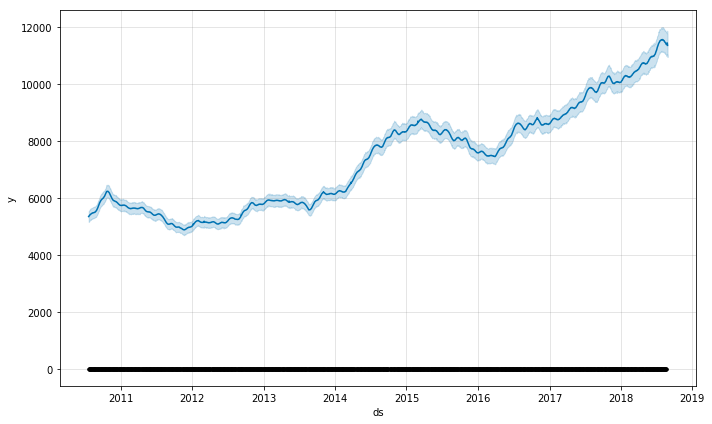

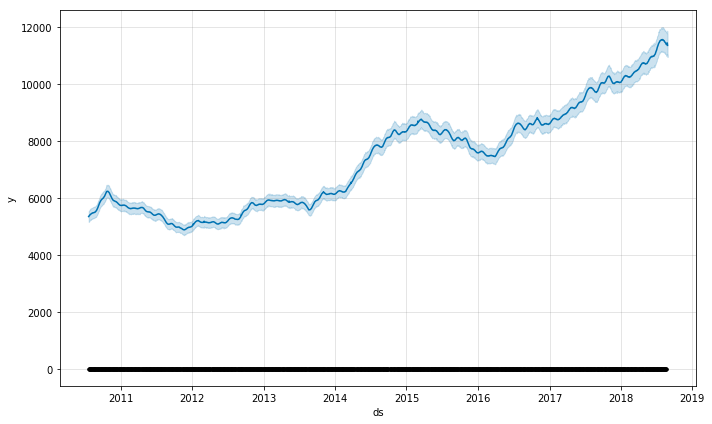

In [19]:
model.plot(forecast_data_origin)

In [20]:
ts['y_log']=ts['y']
ts['y']= ts['y_orgin']

/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


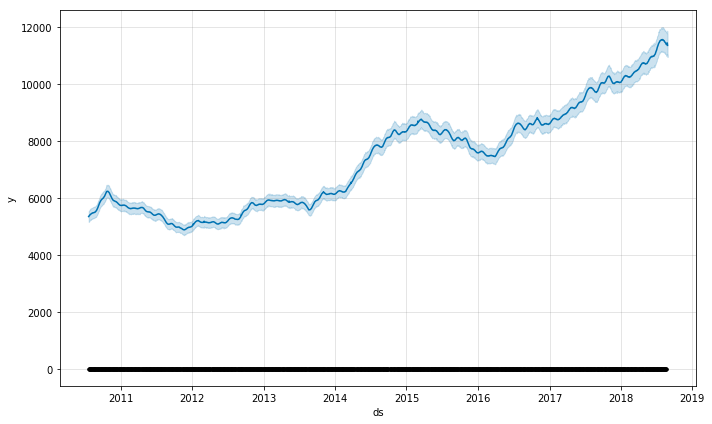

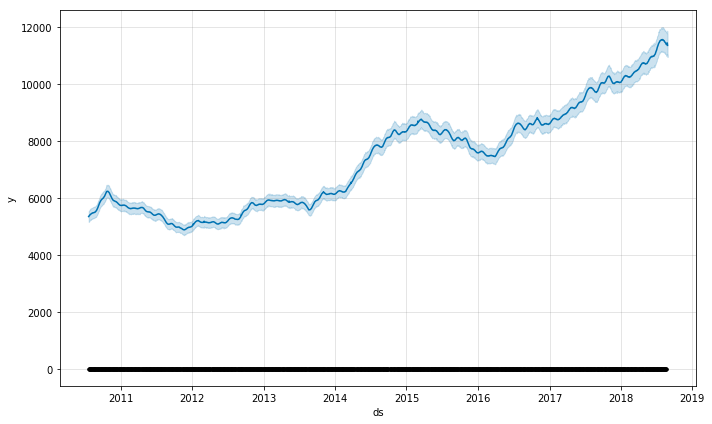

In [21]:
model.plot(forecast_data_origin)

In [22]:
test = pd.read_csv('nifty_test.csv')
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,23-Aug-18,11582.75,11620.70,11620.70,11546.70,256.16M,0.10%
1,24-Aug-18,11557.10,11566.60,11604.60,11532.00,225.60M,-0.22%
2,27-Aug-18,11691.95,11605.85,11700.95,11595.60,205.69M,1.17%
3,28-Aug-18,11738.50,11731.95,11760.20,11710.50,249.42M,0.40%
4,29-Aug-18,11691.90,11744.95,11753.20,11678.85,259.35M,-0.40%


In [24]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2004,2018-08-16,11455.135705,11070.201309,11884.074860
2005,2018-08-17,11443.733615,11051.015293,11863.845245
2006,2018-08-20,11397.464286,11018.686607,11819.914829
2007,2018-08-21,11394.646348,10993.065861,11834.183330
2008,2018-08-22,11394.631565,11008.962153,11820.985532
2009,2018-08-23,11387.196165,10988.581766,11782.548082
2010,2018-08-24,11381.101065,10981.721170,11787.472796
2011,2018-08-25,11446.354612,11056.692253,11874.004121
2012,2018-08-26,11420.725545,10997.703349,11850.307154
2013,2018-08-27,11358.747219,10948.192217,11753.993805


In [25]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2003,14-Aug-18,11435.10,11381.70,11452.45,11370.80,239.84M,0.70%
2004,16-Aug-18,11385.05,11397.15,11449.85,11366.25,299.61M,-0.44%
2005,17-Aug-18,11470.75,11437.15,11486.45,11431.80,241.99M,0.75%
2006,20-Aug-18,11551.75,11502.10,11565.30,11499.65,239.84M,0.71%
2007,21-Aug-18,11570.90,11581.40,11581.40,11539.85,230.95K,0.17%


In [26]:
forecast_data.shape

(2014, 19)

In [27]:
df.shape

(2008, 7)